# Описание проекта
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных

Нам доступен датасет 'games.csv' с данными до 2016 года (представим, что сейчас декабрь 2016 г. и мы планируем кампанию на 2017-й). Нужно отработать принцип работы с данными. Данные за 2016 год могут быть неполными.

Столбцы датасета:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<br><br><br><br>

# 1. Откроем файл с данными и изучим общую информацию

Подключим необходимые для работы модули, считаем данные, запишем их в переменную `df0` и выведем на экран первые 10 строк:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [2]:
df0 = pd.read_csv('/datasets/games.csv')

In [3]:
df0.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем информацию о размере датасета, типах данных, количестве не пустых и пустых значений в столбцах:

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('Количество пропусков в столбцах:')
df0.isna().sum()

Количество пропусков в столбцах:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

ВЫВОДЫ:

Датасет представляет собой таблицу из 16715 строк (записей) и 11 столбцов. В процессе предобработки и подготовки данных для последующего анализа нужно обратить внимание на следующие моменты:
- Названия столбцов нужно привести к нижнему регистру
- Типы данных в некоторых столбцах необходимо привести к правильным (например, столбцы `Year_of_Release` и `User_Score`) 
- В 6 столбцах есть пропущенные значения. Необходимо принять решение, можно ли их заполнить и каким образом
- Также необходимо выполнить проверку на явные и неявные дубликаты

<br><br><br><br>

# 2. Проведем предобработку и подготовим данные

## 2.1. Заменим названия столбцов (приведём к нижнему регистру)

In [6]:
df0.columns = df0.columns.str.lower()
print('Названия столбцов после замены:')
print(', '.join(df0.columns))

Названия столбцов после замены:
name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating


<br><br>

## 2.2. Обработаем пропуски, преобразуем типы данных при необходимости, выявим неявные дубликаты и аномальные значения

По порядку рассмотрим и обработаем все столбцы нашего датасета:

### 2.2.1. Cтолбец `name`:

Тип данных строковый. Выведем записи с пропусками в столбце `name`:

In [7]:
df0[df0['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видим, что в этих же двух записях находятся и те единственные 2 пропущенных значения столбца `genre`. Сложно судить о причинах появления этих пропусков. Возможно, это какой-то технический сбой, или же обычный человеческий фактор - забыли указать названия игр и их жанры. Возможно на тот момент у игры не было официального названия. В любом случае, восстановить пропущенные значения не представляется возможным, поэтому, удалим эти записи:

In [8]:
df0.dropna(subset=['name'], inplace = True)

Выведем количество уникальных значений в столбце `name`:

In [9]:
print('Всего значений:   ', len(df0))
print('Из них уникальных:', df0['name'].nunique())

Всего значений:    16713
Из них уникальных: 11559


Видим, что более 5 тысяч значений в столбце `name` - дублируются. Рассмотрим такие записи внимательнее, отсортируем по названию и выведем первые 10:

In [10]:
df0[df0[['name']].duplicated(keep=False)].sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
2243,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T
1204,007: The World is not Enough,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN


Очевидно, повторяющиеся записи соответствуют одной и той же игре, вышедшей на разных платформах, и в рамках нашего исследования дубликатами не являются

Проверим, есть ли неявные дубликаты, связанные с различным регистром написания. Приведём названия игр в нижний регистр и посчитаем количество уникальных:

In [11]:
df0['name'].str.lower().nunique()

11559

Количество совпадает с количеством уникальных названий игр. Неявные дубликаты в столбце `name` не обнаружены

<br>

### 2.2.2. Cтолбец `platform`:

Тип данных строковый, пропусков нет. Проверим, есть ли неявные дубликаты:

In [12]:
df0['platform'].value_counts().sort_index()

2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

Дубликатов не обнаружено, это действительно все разные платформы

<br>

### 2.2.3. Cтолбец `year_of_release`:

Тип данных вещественный. В столбце 269 пропусков. Причина отсутствия данных в столбце может быть любой - от технического сбоя до человеческого фактора (забыли внести данные). Рассмотрим эти записи подробнее:

In [13]:
df0[df0['year_of_release'].isna()].sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
12241,Alex Rider: Stormbreaker,DS,NaN,Action,0.06,0.00,0.00,0.00,48.0,6.1,T
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8547,Alone in the Dark: The New Nightmare,PS,NaN,Adventure,0.09,0.06,0.00,0.01,77.0,8.1,M


Обычно, релизы игр выходят одновременно на всех платформах. Возможно, для некоторых игр указана дата выхода на одной платформе, но не указана на другой. Тогда мы сможем использовать эту информацию, чтобы заполнить пропуски

Проверим предположение. Выведем для всех платформ информацию по играм, в которых встречаются пропуски в дате релиза. Если дата выхода конкретной игры указана хотя бы для одной из платформ, её можно проставить и для остальных платформ:

In [14]:
# список названий игр, для которых встречаются пропуски в дате релиза
names_without_year = df0.loc[df0['year_of_release'].isna(), 'name'].unique()

In [15]:
# срез датафрейма для игр с такими названиями, отсортированный по названию
df0[df0['name'].isin(names_without_year)].sort_values(by='name').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4800,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,0.00,0.00,0.40,0.00,NaN,NaN,NaN
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2106,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
12241,Alex Rider: Stormbreaker,DS,NaN,Action,0.06,0.00,0.00,0.00,48.0,6.1,T
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E


Видим, что наше предположение действительно подтвердилось - в некоторых играх дата выхода проставлена не для всех платформ. Найдём такие записи и заполним пропуски в датах на основании уже имеющихся дат:

In [16]:
for name in names_without_year:
    df0.loc[df0['name'] == name, 'year_of_release'] = df0.loc[df0['name'] == name, 'year_of_release'].max()

In [17]:
print('Осталось пропусков:', df0['year_of_release'].isna().sum())

Осталось пропусков: 146


Таким образом сократили количество пропусков в столбце `year_of_release` с 269 до 146

Также видим, что некоторые названия игр уже содержат в себе год, например, "All-Star Baseball 2005", однако нет оснований предполагать, что год в названии будет совпадать с датой выхода игры. Более того, выборочная проверка показывает, что это как раз не так. Например, конкретно для игры "All-Star Baseball 2005" дата выхода была в 2004 году

Оставшиеся 146 пропусков удалим:

In [18]:
df0.dropna(subset=['year_of_release'], inplace = True)

Осталось преобразовать тип данных столбца `year_of_release` в целочисленный:

In [19]:
df0['year_of_release'] = df0['year_of_release'].astype('int')

Проверим на аномальные значения и убедимся, что года выпуска адекватные:

In [20]:
df0['year_of_release'].value_counts().sort_index().index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64')

Всё в порядке, года с 1980 по 2016, аномалий не обнаружено.

<br>

### 2.2.4. Cтолбец `genre`:

Тип данных строковый, пропусков нет (были два, но удалены ещё при удалении пропусков в столбце `name`)

Выведем уникальные значения, убедимся, что неявные дубликаты отсутствуют:

In [21]:
print('Названия жанров:')
print(', '.join(df0['genre'].value_counts().sort_index().index))

Названия жанров:
Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role-Playing, Shooter, Simulation, Sports, Strategy


<br>

### 2.2.5. Cтолбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales`:

Тип данных вещественный, пропусков нет, всё норм

Выведем минимальные и максимальные значения для столбцов, чтобы изучить данные на предмет аномалий:

In [22]:
df0[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe().loc[['min', 'max']]

,na_sales,eu_sales,jp_sales,other_sales
min,0.00,0.00,0.00,0.00
max,41.36,28.96,10.22,10.57


Всё в порядке, значения адекватные, аномалий не обнаружено.

<br>

### 2.2.6. Cтолбец `critic_score`:

Тип данных вещественный. Наблюдаем больше половины пропусков. Рассмотрим такие записи с пропусками в столбце `critic_score` повнимательнее:

In [23]:
df0[df0['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На первый взгляд не видно никаких закономерностей (кроме той, что для этих игр как правило также не заполнены ни пользовательская оценка, ни возрастной рейтинг). С пропусками в столбце `critic_score` встречаются как старые, так и "свежие" игры, самых различных жанров, для различных платформ и с разными показателями продаж во всех возможных регионах. Причина отсутствия значений в данном столбце (как и в столбцах `user_score` и `rating`) не ясна. Возможно технический сбой, или человеческий фактор

Заполнять пропуски в данном столбце средними или медианными значениями не имеет смысла, так как это будут заведомо неверные данные, возможно совершенно не соответствующие действительности. Оставим пока как есть

Выведем все уникальные оценки критиков:

In [24]:
df0['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

Аномальных значений (меньше 0, или больше 100) - не выявлено

<br>

### 2.2.7. Cтолбец `user_score`:

Тип данных строковый. Более 6 тысяч пропущенных значений. Выведем все уникальные пользовательские оценки:

In [25]:
df0['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Аномальных числовых значений (меньше 0, или больше 10) - не выявлено

Видим, что все оценки критиков - вещественные числа (десятичные дроби), за исключением значения `tbd`. Аббревиатура TBD - от английского To Be Determined (будет определено) - используется, если какая-то информация еще не определена, или решение по вопросу не принято. В нашем случае заменим данное значение на пропуски:

In [26]:
print(f"Заменены на пропуски значения 'tbd' в количестве {len(df0[df0['user_score']=='tbd'])} шт")
df0.loc[df0['user_score']=='tbd', 'user_score'] = np.NaN

Заменены на пропуски значения 'tbd' в количестве 2394 шт


Заполнять пропуски в данном столбце средними или медианными значениями не имеет смысла, так как это будут заведомо неверные данные, возможно совершенно не соответствующие действительности. Оставим пока как есть

Преобразуем тип данных столбца `user_score` в вещественный:

In [27]:
df0['user_score'] = df0['user_score'].astype('float')

<br>

### 2.2.8. Cтолбец `rating`:

Тип данных строковый. Более 6 тысяч пропущенных значений. Выведем все уникальные возрастные рейтинги:

In [28]:
print('Возрастные рейтинги в классификации ESRB:')
df0['rating'].value_counts()

Возрастные рейтинги в классификации ESRB:


E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Рейтинг это категориальная переменная. Поскольку восстановить пропущенные значения не представляется возможным, заменим все пропуски на "заглушку" - значение 'Unknown':

In [29]:
df0.loc[df0['rating'].isna(), 'rating'] = 'Unknown'

В нашем датасете присутствуют 3 игры с рейтингом "K-A" ("Kids to Adults") - это устаревшее обозначение рейтинга "E" ("Everyone"), использовавшееся до 1999 года. Сделаем замену "K-A" на "E"

Кроме того, встречаются две игры с ещё не присвоенным рейтингом: "RP" ("Rating Pending") - заменим на "Unknown"

Также немного упростим структуру рейтингов и перенесём игры с самыми редкими рейтингами в другие подходящие категории. А именно, заменим рейтинг "AO" ("Adults only 18+") на "M" ("Mature", 17+), а рейтинг "EC" ("Early childhood", 3+) - на "E" ("Everyone"):

In [30]:
df0.loc[df0['rating'] == 'K-A', 'rating'] = 'E'
df0.loc[df0['rating'] == 'RP', 'rating'] = 'Unknown'
df0.loc[df0['rating'] == 'AO', 'rating'] = 'M'
df0.loc[df0['rating'] == 'EC', 'rating'] = 'E'

Итоговая сетка рейтингов:

In [31]:
print('Возрастные рейтинги в датасете:')
print(', '.join(df0['rating'].value_counts().index))

Возрастные рейтинги в датасете:
Unknown, E, T, M, E10+


<br><br>

## 2.3. Выявим дублированные записи

Напоследок проверим, есть ли в нашем датасете дубликаты. Выведем дублированные записи по такому набору столбцов, который должен однозначно определять игру, а именно по названию, платформе, году и жанру:

In [32]:
# список столбцов для поиска дубликатов
columns = ['name', 'platform', 'year_of_release', 'genre']

# записи со всеми найденными дубликатами
dup_games = df0[df0[columns].duplicated(keep=False)].sort_values(by='name')
dup_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,2006,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Видим, что две игры полностью повторяются, отличия лишь в количестве проданных копий. Для каждой из этих двух игр просуммируем по столбцам количество продаж в дублирующихся записях, сохраним результат в первой записи, а все остальные удалим:

In [33]:
# записи на удаление - все дубликаты, кроме первых найденных
games_to_del = df0[df0[columns].duplicated(keep='first')]

In [34]:
# записи, которые нужно оставить - с первыми найденными дубликатами
games_to_keep = dup_games[~dup_games.index.isin(games_to_del.index)]

In [35]:
# цикл по индексам записей, которые нужно оставить
for i in games_to_keep.index:
    # цикл по столбцам, в которых нужно сложить значения (в рамках дублированных записей)
    for sales in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
        # суммируем количество продаж, записываем значение в первый найденный дубликат
        df0.loc[i, sales] = dup_games.loc[dup_games['name'] == df0.loc[i, 'name'], sales].sum()

Выведем из дубликатов те записи, которые оставим в датасете, с обновленными просуммированными продажами по регионам. Убедимся, что продажи просуммированы корректно:

In [36]:
df0.loc[games_to_keep.index]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+


Удалим из датасета все дублированные записи, кроме первых найденных:

In [37]:
df0.drop(games_to_del.index, inplace=True)

In [38]:
# В нашем датасете оказалось всего две дублированных игры (по две копии каждой). И конечно можно было в данном
# случае сделать всё намного проще, используя конкретные индексы и числа, например, так:
# df0.loc[604, 'eu_sales'] = 0.23
# df0.loc[1745, 'eu_sales'] = 0.54
# df0.drop([4127, 16230], inplace=True)

# Но здесь была намеренно отработана схема удаления дубликатов в общем виде, на случай, если повторяющихся игр
# было бы гораздо больше двух (а также для случаев, когда для каждой игры количество дубликатов может превышать 2)

<br><br>

## 2.4. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [39]:
df0['total_sales'] =  df0[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<br><br>

## 2.5. Подведём итоги предобработки и подготовки данных

Выведем первые 5 строк нашего датасета, а также информацию о его размерах, типах данных, количестве не пустых и пустых значений в столбцах:

In [40]:
df0.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [41]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16565 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16565 non-null  object 
 1   platform         16565 non-null  object 
 2   year_of_release  16565 non-null  int64  
 3   genre            16565 non-null  object 
 4   na_sales         16565 non-null  float64
 5   eu_sales         16565 non-null  float64
 6   jp_sales         16565 non-null  float64
 7   other_sales      16565 non-null  float64
 8   critic_score     8073 non-null   float64
 9   user_score       7538 non-null   float64
 10  rating           16565 non-null  object 
 11  total_sales      16565 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


ВЫВОДЫ:

В результате предобработки и подготовки данных:
- Заменили названия столбцов (привели к нижнему регистру)
- Обработали пропуски, преобразовали типы данных при необходимости, выявили явные и неявные дубликаты, проверили данные на аномальные значения:
    - удалили 2 записи с пропущенными значениями в столбцах `name` и `genre`
    - сократили количество пропусков в столбце `year_of_release` с 269 до 146
    - удалили 146 записей с пропусками в столбце `year_of_release`
    - преобразовали тип данных столбца `year_of_release` в целочисленный
    - заменили значения 'tbd' в столбце `user_score` на пропуски
    - преобразовали тип данных столбца `user_score` в вещественный
    - упростили структуру рейтингов в столбце `rating`
    - заменили все пропуски на значение 'Unknown' в столбце `rating`
    - удалили 2 явные дублированные записи из датасета
- Посчитали суммарные продажи во всех регионах, записали в отдельный столбец `total_sales`

Итого из датасета удалено 150 записей, что составляет менее 0.9%

<br><br><br><br>

# 3. Проведем исследовательский анализ данных

## 3.1. Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды

Выведем количество выпускаемых игр по годам:

In [42]:
games_by_year = df0['year_of_release'].value_counts().sort_index()
games_by_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      40
1992      43
1993      60
1994     120
1995     219
1996     263
1997     288
1998     378
1999     338
2000     348
2001     481
2002     847
2003     787
2004     766
2005     946
2006    1021
2007    1202
2008    1437
2009    1434
2010    1275
2011    1153
2012     661
2013     545
2014     584
2015     606
2016     502
Name: year_of_release, dtype: int64

Построим для наглядности график:

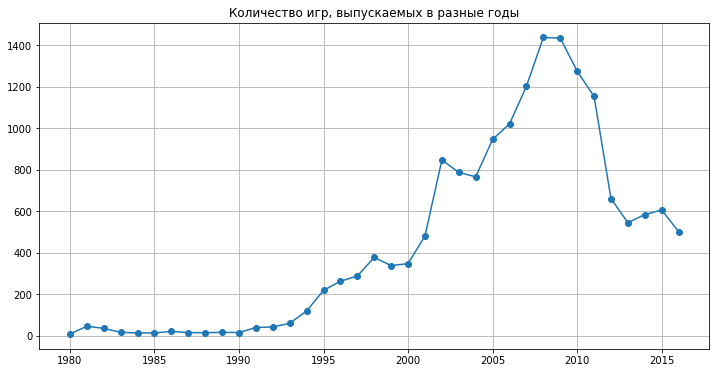

In [43]:
games_by_year.plot(style='o-', grid=True, figsize=(12, 6))
plt.title("Количество игр, выпускаемых в разные годы")
plt.show()

Из полученных данных видим, что количество выпускаемых компьютерных игр начало быстро расти с 90-х годов до примерно 2008-2009 года. Затем наблюдается переломный момент и последующий спад, связанный, вероятно, с началом массового создания и распространения мобильных игр (В частности, благодаря появлению IPhone и Apple Store)

Видим, что большая часть игр была выпущена в период с начала двухтысячных по 2016 г

Очевидно, для прогнозирования выпуска игр и планирования рекламных кампаний на 2017 год не имеет смысла анализировать все данные. К примеру, старые игры на старых платформах использовали другие технологии, у них была совершенно другая непритязательная аудитория. Также в прошлом скорее всего были другие жанровые предпочтения. Поэтому анализ таких данных может даже навредить нашей цели и значительно исказить реальное положение на рынке компьютерных игр. Наша задача определить актуальный период для исследования, близкий к настоящему времени и с достаточным количеством данных

<br><br>

## 3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Исследуем, за какой характерный срок появляются новые и исчезают старые платформы

Выведем сводную таблицу количества проданных игр для всех платформ по годам:

In [44]:
platforms_sales_year = df0.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platforms_sales_year

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отобразим всю информацию из полученой сводной таблицы в виде графиков. Возможно это будет не очень наглядно, так как у нас более 30 платформ, однако даст нам общее представление о характере и динамике продаж для платформ и подскажет дальнейшие пути исследования:

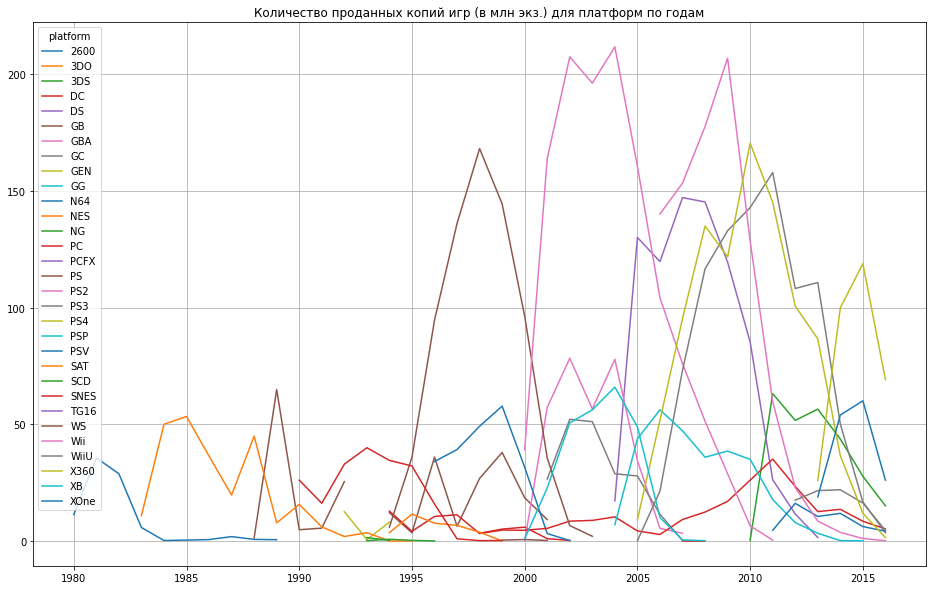

In [45]:
platforms_sales_year.plot(xlabel='', grid=True, figsize=(16, 10))
plt.title("Количество проданных копий игр (в млн экз.) для платформ по годам")
plt.show()

Действительно, многие графики смешиваются друг с другом. А из-за большого количества платформ не всегда можно с уверенностью идентифицировать их по цвету

Однако даже из данных графиков видно, что среди всего многообразия игровых платформ существуют явные лидеры по количеству проданных копий игр

Также виден жизненный цикл для каждой платформы - чёткие этапы старта продаж, развития, спада и окончания. Судя по графикам, обычно для платформ он составляет порядка 8-12 лет. Однако из этой закономерности выбивается график для PC (продажи игр для персонального компьютера), жизненный цикл которого не прекращается с 1994 по 2016 год

Также отметим, что в последние пару лет видны только два графика с явным ростом продаж, а остальные отражают спад (2016 год не учитываем, т.к. возможно данные по нему неполные). Проверим это предположение чуть позже

Рассмотрим самые популярные платформы (с наибольшими суммарными продажами) за всё время - выведем список и визуализируем в виде столбчатой диаграммы:

In [46]:
platforms_sales = (df0.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                   .sort_values(by='total_sales', ascending=False))
display(platforms_sales)

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


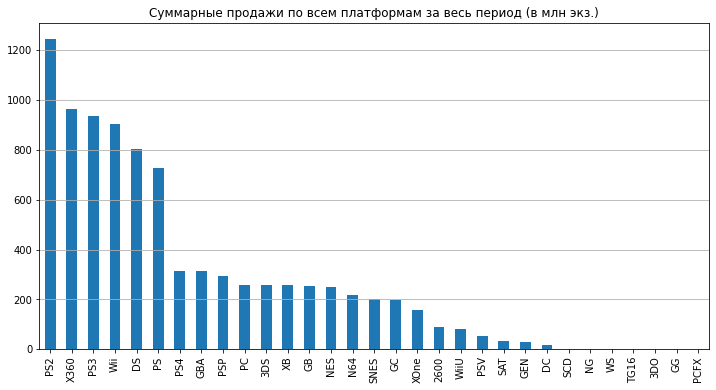

In [47]:
platforms_sales.plot(kind='bar', xlabel='', grid=True, legend=False, figsize=(12, 6))
plt.title('Суммарные продажи по всем платформам за весь период (в млн экз.)')
plt.grid(axis='x')
plt.show()

Видим, что на общем фоне выделяются 6 самых популярных игровых платформ за весь период (с максимальными суммарными продажами игр):
- PS2 (Sony PlayStation 2)
- X360 (Xbox 360 от Microsoft)
- PS3 (Sony PlayStation 3)
- Wii (Nintendo Wii)
- DS (Nintendo DS)
- PS (Sony PlayStation)

Посмотрим, как распределены продажи игр для этих платформ по годам:

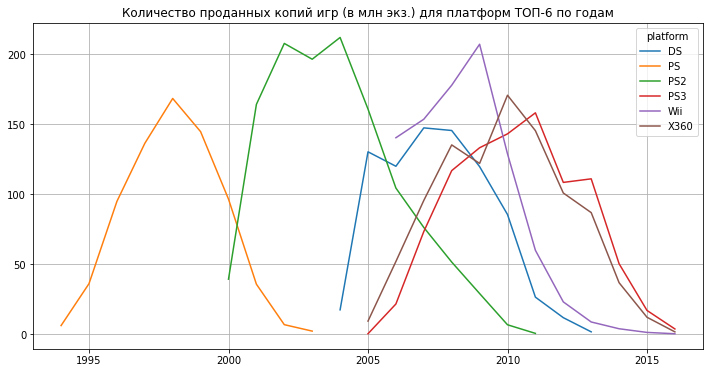

In [48]:
# платформы ТОП-6
platforms_top6 = platforms_sales.head(6).index

# сводная таблица количества проданных копий игр для платформ ТОП-6 по годам
platforms_top6_sales_year = (df0.query('platform in @platforms_top6')
                             .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

platforms_top6_sales_year.plot(xlabel='', grid=True, figsize=(12, 6))
plt.title("Количество проданных копий игр (в млн экз.) для платформ ТОП-6 по годам")
plt.xlim(1993, 2017)
plt.show()

В ТОП-6 у нас попали сразу 3 игровых приставки платформы PlayStation. И на этом примере хорошо видна преемственность версий - как только одна приставка начинает терять продажи, на смену ей выходит новая. Рассмотрим этот процесс более внимательно на примере продуктовых линеек двух гигантов в мире игровой индустрии - PlayStation и Xbox:

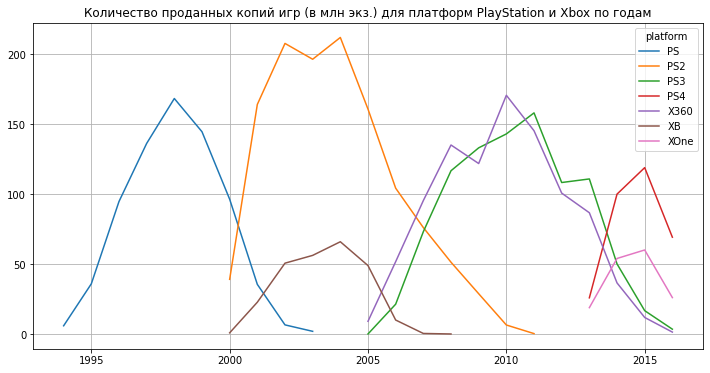

In [49]:
# сводная таблица количества проданных копий игр для платформ PlayStation и Xbox по годам
platforms_ps_xb_sales_year = (df0.query('platform in ["PS", "PS2", "PS3", "PS4", "XB", "X360", "XOne"]')
                              .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'))

platforms_ps_xb_sales_year.plot(xlabel='', grid=True, figsize=(12, 6))
plt.title("Количество проданных копий игр (в млн экз.) для платформ PlayStation и Xbox по годам")
plt.show()

На примере PlayStation и Xbox мы видим из графиков, что новые версии игровых платформ выходят каждые 5-8 лет. Жизненный цикл платформы длится порядка 9-11 лет. Новые платформы быстро набирают популярность, за 3-5 лет выходят на максимум продаж, а затем их продажи снижаются. Исходя из этих тенденций, появившиеся в 2013 году платформы PS4 и XOne будут показывать рост продаж ещё как минимум 2-3 года и просуществуют до 2022-2024 года

Время "жизни" платформы мы отметили визуально на графике, как 9-11 лет, на примере PlayStation и Xbox. Рассчитаем этот параметр более точно на примере ТОП-10 платформ (Заведомо исключим из списка платформ "PC", как долгоживущую платформу - выброс, который будет искажать результаты):

In [50]:
# платформы ТОП-10
platforms_top10 = platforms_sales.head(10).index

# посчитаем среднее количество годов, в которые были выпущены игры для сгруппированного по платформам среза ТОП-10.
print('Среднее время жизни для игровой платформы, лет:', 
      round(df0.query('platform in @platforms_top10 and platform != "PC"')
            .groupby('platform')['year_of_release'].nunique().mean(), 2))

Среднее время жизни для игровой платформы, лет: 10.33


<br><br>

## 3.3. Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы

Наиболее актуальным являлся бы период, включающий в себя появление новых, набирающих популярность, платформ PS4 и XOne (то есть с 2013 г). Однако, данным по ним не так много, т.к. они находятся в самом начале своего жизенного цикла

С учетом уже проделанного исследования предыдущих вопросов кажется целесообразным выбрать актуальный период 10-11 последних лет в датасете (с 2005 г). В этот период заведомо попадают и новые платформы PS4 и XOne, и несколько топовых платформ предыдущего поколения, причём, представленные в полном цикле, от старта до окончания продаж. Игры для предпоследних моделей платформ отличаются от новых игр не так кардинально, как совсем старые игры, поэтому аналитика по ним не будет вносить существенную погрешность в общую картину

Кроме того, именно за последние 10-11 лет вышло большинство игр за всю историю:

In [51]:
# год начала актуального периода
from_year = 2005

In [52]:
games_from_year = len(df0.query('year_of_release >= @from_year'))
print(f'Общее количество игр: {len(df0)}')
print(f'Количество игр, вышедших с {from_year} г: {games_from_year} ({games_from_year / len(df0):.2%})')

Общее количество игр: 16565
Количество игр, вышедших с 2005 г: 11366 (68.61%)


Итак, актуальным периодом для дальнейшего анализа будем считать период с 2005 года. Запишем эти данные в новую переменную - датафрейм `df`:

In [53]:
df = df0.query('year_of_release >= @from_year')

<br><br>

## 3.4. Выясним, какие платформы лидируют по продажам, какие растут или падают. Выберем несколько потенциально прибыльных платформ

Выведем текущие платформы - по которым есть продажи игр за последние 4 года, включая неполный (возможно) 2016 г.:

In [54]:
curent_platforms = platforms_sales_year.T[[2013, 2014, 2015, 2016]].dropna(axis=0)
curent_platforms

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
PC,12.66,13.63,8.52,5.25
PS3,110.83,50.18,16.82,3.60
PS4,25.99,100.00,118.90,69.25
PSV,10.59,11.90,6.25,4.25
Wii,8.59,3.75,1.14,0.18
WiiU,21.65,22.03,16.35,4.60
X360,86.70,36.62,11.96,1.52
XOne,18.96,54.07,60.14,26.15


Добавим столбец с совокупными продажами за 4 года, а так же столбцы с показателями роста или падения продаж в 2014 и 2015 году (т.к. данные за 2016 год могут быть неполными) Отсортируем по совокупным продажам:

In [55]:
curent_platforms['total'] = curent_platforms[[2013, 2014, 2015, 2016]].sum(axis = 1)
curent_platforms['2014_growth'] = curent_platforms[2014] > curent_platforms[2013]
curent_platforms['2015_growth'] = curent_platforms[2015] > curent_platforms[2014]
curent_platforms.sort_values(by='total', ascending=False)

year_of_release,2013,2014,2015,2016,total,2014_growth,2015_growth
platform,,,,,,,
PS4,25.99,100.00,118.90,69.25,314.14,True,True
PS3,110.83,50.18,16.82,3.60,181.43,False,False
XOne,18.96,54.07,60.14,26.15,159.32,True,True
3DS,56.57,43.76,27.78,15.14,143.25,False,False
X360,86.70,36.62,11.96,1.52,136.80,False,False
WiiU,21.65,22.03,16.35,4.60,64.63,True,False
PC,12.66,13.63,8.52,5.25,40.06,True,False
PSV,10.59,11.90,6.25,4.25,32.99,True,False
Wii,8.59,3.75,1.14,0.18,13.66,False,False


Видим, что среди лидеров первые три места по продажам за 4 года занимают платформы: PS4, PS3, XOne (продажи игр 314, 181 и 159 млн. экземпляров соответственно). Однако только две платформы из 9 (PS4 и XOne) показывают рост продаж на протяжении 2014-2015 годов. Остальные находятся либо в конце жизненного цикла, либо показывают гораздо более низкий уровень продаж по сравнению с лидерами и продолжают их снижать

Очевидно перспективными и потенциально прибыльными платформами на 2017 год являются PS4 и XOne. Они находятся практически на старте и ещё как минимум пару лет будут показывать рост продаж

Не стоит забывать и про PC. Компьютеры являются старожилами в игровой индустрии и, не смотря на то, что продажи игр для PC не показывают таких больших результатов, как у топовых платформ, пока нет никаких предпосылок, что они будут полностью вытеснены консолями

<br><br>

## 3.5. Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам. Опишем результат

Выведем заново ТОП-10 платформ по продажам игр (учитывая уже только актуальный выбранный период):

In [56]:
platforms_sales = (df.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'count']))
platforms_sales.columns = ['sales', 'games']
platforms_sales = platforms_sales.sort_values(by='sales', ascending=False)

print('Продажи игр и количество выпущенных игр по всем платформам за актуальный период (с', from_year, 'г.):')
platforms_sales

Продажи игр и количество выпущенных игр по всем платформам за актуальный период (с 2005 г.):


,sales,games
platform,,
X360,966.61,1250
PS3,935.19,1318
Wii,903.31,1301
DS,786.99,2105
PS2,428.34,1071
PS4,314.14,392
PSP,286.51,1188
3DS,258.53,515
PC,170.84,825


In [57]:
# платформы ТОП-10
platforms_top10 = platforms_sales.head(10).index
print('ТОП-10 платформ по продажам игр за актуальный период (с', from_year, 'г.):')
print(', '.join(platforms_top10))

ТОП-10 платформ по продажам игр за актуальный период (с 2005 г.):
X360, PS3, Wii, DS, PS2, PS4, PSP, 3DS, PC, XOne


Построим диаграммы размаха для ТОП-10 платформ:

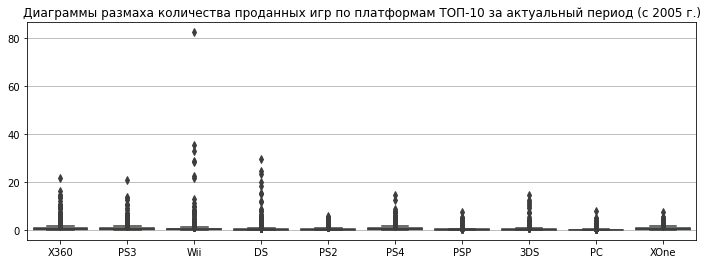

In [58]:
plt.subplots(figsize=(12, 4))
sns.boxplot(data=df.query('platform in @platforms_top10'), x='platform', y='total_sales', order=platforms_top10)
plt.title('Диаграммы размаха количества проданных игр по платформам ТОП-10 за актуальный период (с ' + str(from_year) + ' г.)')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(axis='y')
plt.show()

Видно, что для каждой платформы характерно большое количество выбросов - наиболее успешных игр, продающихся в больших количествах, тиражами от 2 до десятков млн копий. Особенно выделяется игра-рекордсмен в платформе Wii с продажами более 80 млн экз. Посмотрим, что это за игра, а также выведем список игр с продажами более 20 млн экз:

In [59]:
df.query('total_sales > 20')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unknown,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


Отметим тот факт, что, очевидно, изначальный датасет был отсортирован по убыванию совокупного количества продаж в регионах (затем данные были утеряны/удалены, но мы их восстановили в столбце `total_sales`)

Такие популярные игры в каждой платформе являются экстремальными значениями - выбросами в общей массе данных, и сильно увеличивают среднее значение продаж по платформам, по сравнению с медианой. Выведем диаграммы размаха в увеличенном масштабе. Проставим на каждой среднее значение (белые метки):

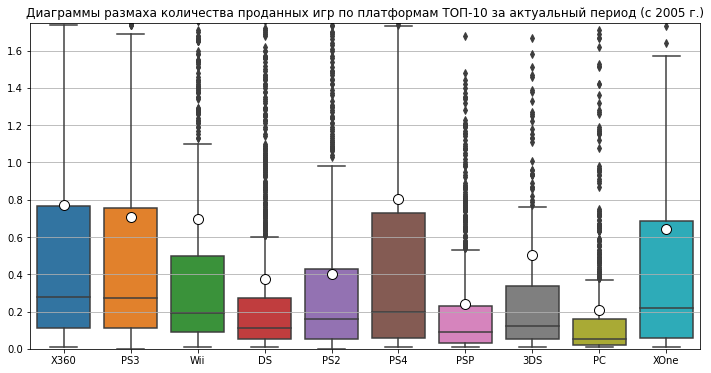

In [60]:
plt.subplots(figsize=(12, 6))
sns.boxplot(data=df.query('platform in @platforms_top10'), x='platform', y='total_sales', order=platforms_top10, 
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})
plt.title('Диаграммы размаха количества проданных игр по платформам ТОП-10 за актуальный период (с ' + str(from_year) + ' г.)')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(axis='y')
plt.ylim(0, 1.75)
plt.show()

Видим, что количество проданных копий игр характерно в значениях от 0 до 1.7 млн экз. для популярных и перспективных платформ. Для остальных платформ данный параметр характерен в интервале от 0 до 0.4-1.1 млн экз. Среднее значение продаж варьируется в пределах 200-800 тыс экз., а медианные не превышают 300 тыс экз.

Видим, что во всех без исключения случаях средние значения гораздо больше медианы

Кажется, что платформы расположены в хаотичном порядке - ни средние, ни медианы не подчиняются никакой закономерности, растут и падают от платформы к платформе. Однако, это не так. Платформы, расположены в порядке убывания продаж. А совокупные продажи зависят не только от того, насколько успешно продаются игры, но и от количества выпущенных для данной платформы игр

Выведем столбчатую диаграмму суммарных продаж и количества игр для каждой платформы:

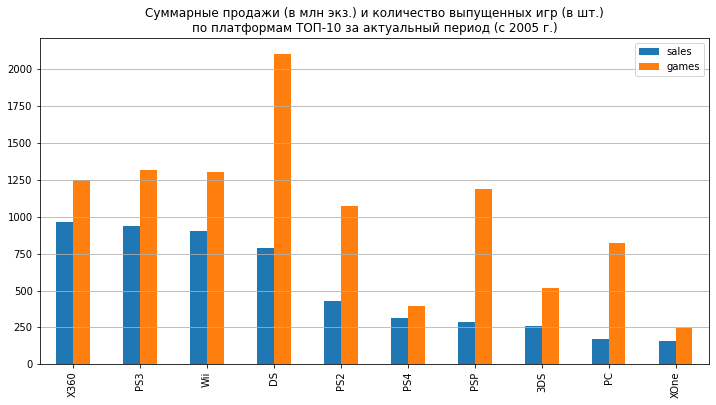

In [61]:
platforms_sales.query('platform in @platforms_top10').plot(kind='bar', xlabel='', grid=True, figsize=(12, 6))
plt.title('Суммарные продажи (в млн экз.) и количество выпущенных игр (в шт.)\nпо платформам ТОП-10 за актуальный период (с '
          + str(from_year) + ' г.)')
plt.grid(axis='x')
plt.show()

К примеру, рассмотрим платформы PS2 и PS4. На графике с диаграммами размаха мы видим, что и среднее значение, и медиана выше у продаж игр для PS4. Но за счет того, что у PS2 было выпущено гораздо больше игр за актуальный период, чем у PS4, ей достаточно меньших показателей продаж, чтобы "обогнать" PS4 в ТОП-10 и встать впереди

<br><br>

## 3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы

Напишем функцию, которая для выбранной платформы построит диаграммы рассеяния - зависимости продаж от оценок критиков и пользователей и посчитает коэффициенты корреляции между этими показателями:

In [62]:
# функция принимает коэффициент корреляции Пирсона и возвращает текстовое описание силы связи по шкале Чеддока
def get_corr_strength(corr):
    strength = ' обратная' if corr < 0 else ' прямая'
    strength += ' связь)'
    corr = abs(corr)
    if corr >= 0.9:
        strength = '(весьма высокая' + strength
    elif corr >= 0.7:
        strength = '(высокая' + strength
    elif corr >= 0.5:
        strength = '(заметная' + strength
    elif corr >= 0.3:
        strength = '(умеренная' + strength
    elif corr >= 0.1:
        strength = '(слабая' + strength
    else:
        strength = '(связь отсутствует)'
    return strength

# функция принимает название платформы, строит для нее диаграммы рассеяния (оценки - продажи) и выводит коэфф корреляции
def get_scatter_corr(platform=''):
    title = 'Зависимость между оценками критиков, оценками пользователей и продажами игр'
    title += ' для платформы ' + platform if platform else ''
    data = df.query('platform == @platform') if platform else df.copy()

    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16, 3))
    fig.suptitle(title)

    sns.scatterplot(data=data, x='critic_score', y='total_sales', ax=ax[0])
    ax[0].set_xlabel('Оценки критиков')
    ax[0].set_ylabel('')
    ax[0].grid(True)

    sns.scatterplot(data=data, x='user_score', y='total_sales', ax=ax[1])
    ax[1].set_xlabel('Оценки пользователей')
    ax[1].set_ylabel('')
    ax[1].grid(True)

    plt.show()

    critic_corr = data['critic_score'].corr(data['total_sales'])
    user_corr = data['user_score'].corr(data['total_sales'])
    if platform: print('Для платформы ' + platform + ':')
    print('Корреляция между оценками критиков и продажами игр:     ', round(critic_corr, 2), get_corr_strength(critic_corr))
    print('Корреляция между оценками пользователей и продажами игр:', round(user_corr, 2), get_corr_strength(user_corr))

Выведем диаграммы рассеяния и коэффициенты корреляции для первой платформы из нашего ТОП-10 списка:

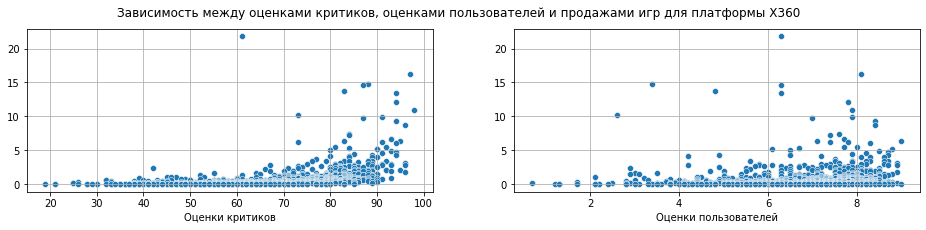

Для платформы X360:
Корреляция между оценками критиков и продажами игр:      0.39 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.11 (слабая прямая связь)


In [63]:
get_scatter_corr('X360')

Наблюдаем умеренную связь между продажами игр и оценками критиков и слабую связь между продажами игр и оценками пользователей. Похоже, пользователи больше прислушиваются к мнению критиков при выборе и покупке игры, чем к мнению таких же пользователей. Проверим это предположение для остальных платформ

<br><br>

## 3.7. Соотнесём выводы с продажами игр на других платформах

Построим диаграммы и рассчитаем коэффициенты корреляции для остальных платформ из списка ТОП-10:

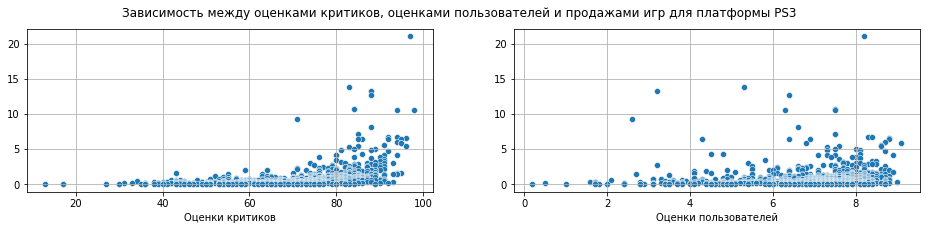

Для платформы PS3:
Корреляция между оценками критиков и продажами игр:      0.43 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.13 (слабая прямая связь)





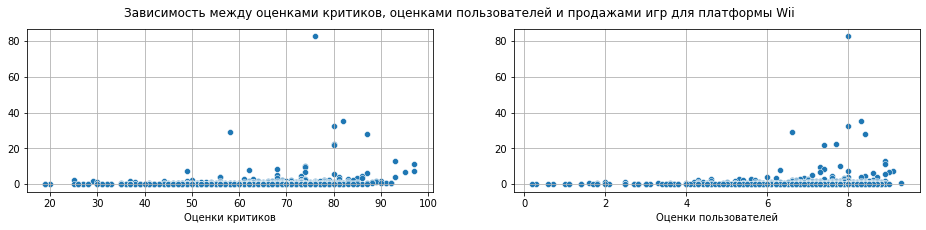

Для платформы Wii:
Корреляция между оценками критиков и продажами игр:      0.18 (слабая прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.11 (слабая прямая связь)





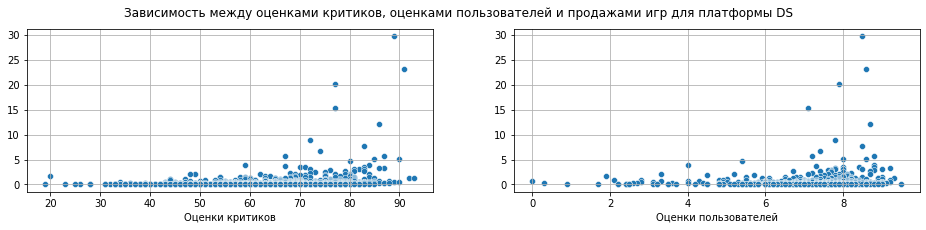

Для платформы DS:
Корреляция между оценками критиков и продажами игр:      0.24 (слабая прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.13 (слабая прямая связь)





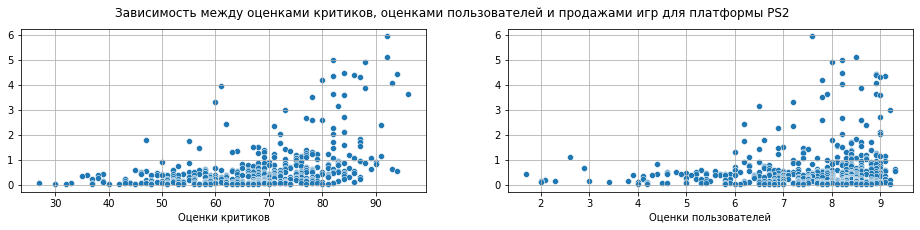

Для платформы PS2:
Корреляция между оценками критиков и продажами игр:      0.42 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.19 (слабая прямая связь)





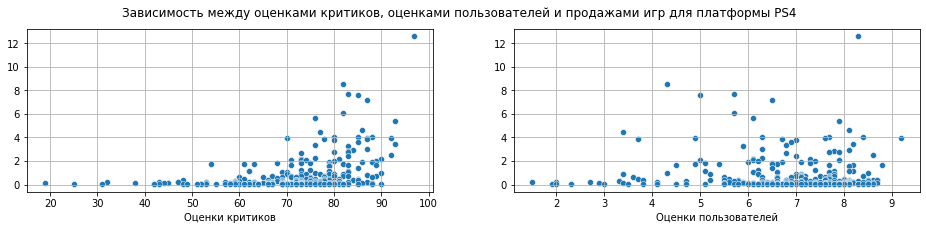

Для платформы PS4:
Корреляция между оценками критиков и продажами игр:      0.41 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: -0.03 (связь отсутствует)





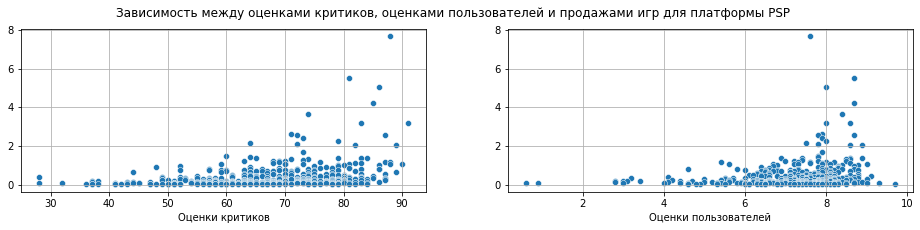

Для платформы PSP:
Корреляция между оценками критиков и продажами игр:      0.31 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.21 (слабая прямая связь)





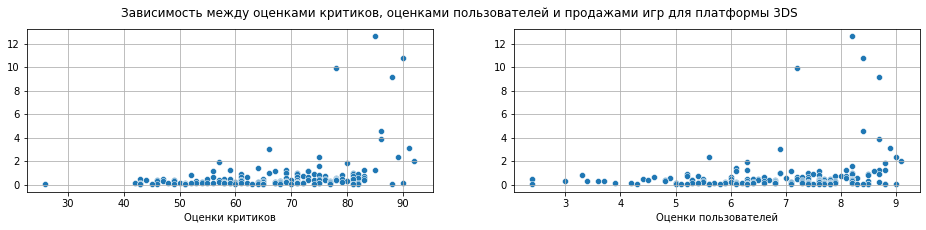

Для платформы 3DS:
Корреляция между оценками критиков и продажами игр:      0.35 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: 0.22 (слабая прямая связь)





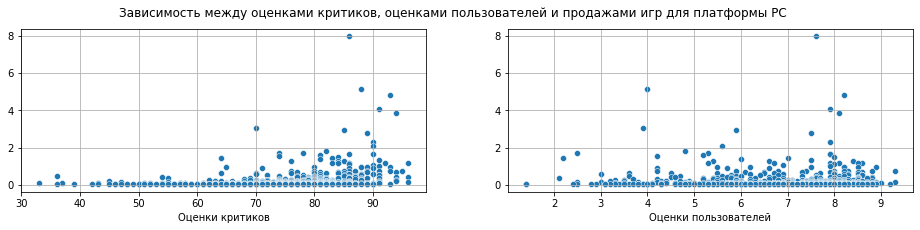

Для платформы PC:
Корреляция между оценками критиков и продажами игр:      0.28 (слабая прямая связь)
Корреляция между оценками пользователей и продажами игр: -0.03 (связь отсутствует)





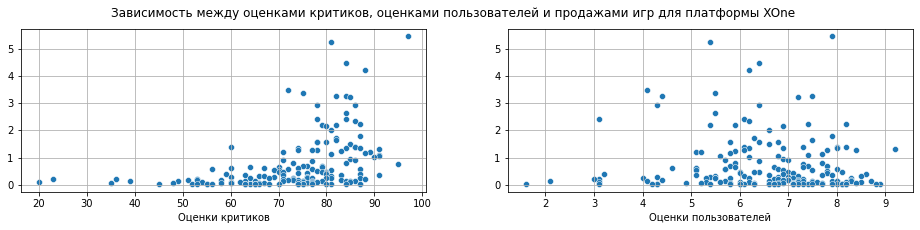

Для платформы XOne:
Корреляция между оценками критиков и продажами игр:      0.42 (умеренная прямая связь)
Корреляция между оценками пользователей и продажами игр: -0.07 (связь отсутствует)





In [64]:
for platform in platforms_top10[1:]:
    get_scatter_corr(platform)
    print('\n\n')

Предположение в целом подтверждается, почти для всех рассмотренных платформ из ТОП-10 обнаружена умеренная прямая связь между продажами игр и оценками критиков и слабая связь между продажами игр и оценками пользователей

В некоторых случаях, например для новых платформ PS4 и XOne, связь продаж и оценок пользователей вообще отсутствует. Возможно это связано с инертностью пользователей, которые привыкли к платформам предыдущей версии и склонны недооценивать новинки, либо давать субъективную и предвзятую оценку (многие успешные игры были оценены пользователями весьма не высоко). Критики же, стараясь быть непредвзятыми, в большинстве случаев дают более адекватную оценку играм

<br><br>

## 3.8. Посмотрим на общее распределение игр по жанрам. Исследуем самые продаваемые жанры. Выясним, выделяются ли жанры с высокими и низкими продажами

Выведем количество игр в разных жанрах:

In [65]:
genres = df.pivot_table(index='genre', values='name', aggfunc='count').rename(columns={'name': 'games'})
genres['games_ratio'] = round(genres['games'] * 100 / len(df), 2)

print('Количество и процентное соотношение игр по жанрам:')
genres.sort_values(by='games', ascending=False)

Количество и процентное соотношение игр по жанрам:


,games,games_ratio
genre,,
Action,2603,22.90
Sports,1400,12.32
Misc,1382,12.16
Role-Playing,1069,9.41
Adventure,1066,9.38
Shooter,845,7.43
Simulation,647,5.69
Racing,643,5.66
Fighting,458,4.03


Визуализируем для наглядности в виде круговой диаграммы:

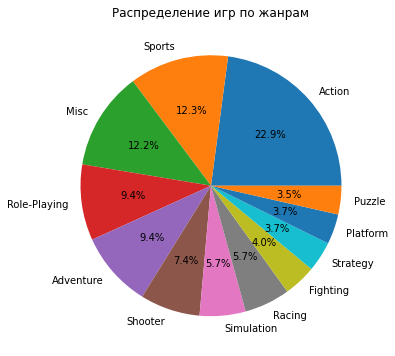

In [66]:
genres['games'].sort_values(ascending=False).plot(kind='pie', label='', figsize=(6, 6), autopct='%1.1f%%')
plt.title('Распределение игр по жанрам')
plt.show()

Видим, что больше всего игр произведено в жанрах Action, Sports и Misc - 3 этих жанра охватывают почти половину - более 47% всех игр за актуальный период. Наименее популярные жанры - Puzzle, Platform и Strategy - чуть более 10%

Добавим колонку с продажами игр и отсортируем по ней:

In [67]:
genres['sales'] = df.groupby('genre')['total_sales'].sum()
genres.sort_values(by='sales', ascending=False)

,games,games_ratio,sales
genre,,,
Action,2603,22.90,1219.00
Sports,1400,12.32,862.06
Shooter,845,7.43,764.16
Misc,1382,12.16,620.25
Role-Playing,1069,9.41,551.14
Racing,643,5.66,355.43
Platform,424,3.73,307.87
Simulation,647,5.69,270.12
Fighting,458,4.03,208.30


Визуализируем в виде линейчатой диаграммы для наглядности:

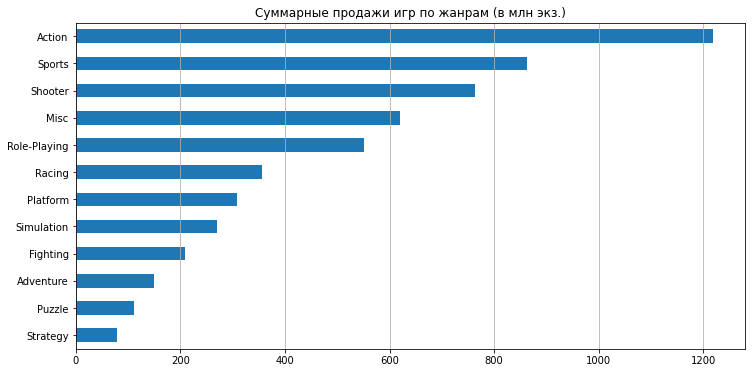

In [68]:
genres['sales'].sort_values().plot(kind='barh', xlabel='', grid=True, legend=False, figsize=(12, 6))
plt.title('Суммарные продажи игр по жанрам (в млн экз.)')
plt.grid(axis='y')
plt.show()

Видим, что рейтинг жанров немного поменялся. Первое и второе место по-прежнему занимают жанры Action и Sports, а на третье место по количеству проданных экземпляров игр вырвался жанр Shooter. Тройка анти-лидеров также поменялась: Strategy, Puzzle, Adventure

Мы изучили распределение игр по жанрам, составили рейтинг самых продаваемых жанров, отметили фаворитов и аутсайдеров.. Однако, рассмотрим ещё один интересный параметр оценки жанра, как "продажи_средней_игры_жанра":

В каком-то отдельно взятом жанре может быть выпущено совсем немного игр, но они обрели большую популярность и были проданы в больших количествах. Например, жанр Platform (424 игры было выпущено, продажи составили 308 млн экз., то есть, каждая игра была продана в среднем в количестве ~726 тыс экз.) И противоположная ситуация - когда игр "наштамповано" много, а совокупные продажи невелики. Например, жанр Adventure (выпущено 1066 игр, продажи 150 млн экз., то есть каждая игра была продана в среднем в количестве ~140 тыс экз.)

Рассчитаем новый параметр, добавим в таблицу и отсортируем по нему жанры:

In [69]:
genres['game_sales'] = genres['sales'] / genres['games']
genres.sort_values(by='game_sales', ascending=False)

,games,games_ratio,sales,game_sales
genre,,,,
Shooter,845,7.43,764.16,0.904331
Platform,424,3.73,307.87,0.726108
Sports,1400,12.32,862.06,0.615757
Racing,643,5.66,355.43,0.552768
Role-Playing,1069,9.41,551.14,0.515566
Action,2603,22.90,1219.00,0.468306
Fighting,458,4.03,208.30,0.454803
Misc,1382,12.16,620.25,0.448806
Simulation,647,5.69,270.12,0.417496


Рейтинг по новому параметру опять изменился. Жанры с самыми продаваемыми играми - это Shooter, Platform и Sports. Антирейтинг воглавляют: Adventure, Strategy и Puzzle

<br><br>

## 3.9. Подведём итоги исследовательского анализа данных

ВЫВОДЫ:

В результате исследовательского анализа данных:
- Выявили, что большая часть игр была выпущена в период с начала двухтысячных по 2016 г
- Выявили жизненный цикл для платформ порядка 10 лет
- Определили, что новые версии платформ выходят каждые 5-8 лет и за 3-5 лет выходят на максимум продаж
- Выделили ТОП-6 платформ по продажам игр за весь период: PS2, X360, PS3, Wii, DS, PS
- Определили актуальный период для дальнейшего исследования с 2005 года
- Определили перспективные и потенциально прибыльные платформы на 2017 год: PS4 и XOne
- Определили ТОП-10 платформ по продажам игр за период с 2005 г: X360, PS3, Wii, DS, PS2, PS4, PSP, 3DS, PC, XOne
- Определили, что количество проданных копий игр характерно в значениях от 0 до 1.7 млн экз. для популярных и перспективных платформ. Для остальных платформ данный параметр характерен в интервале от 0 до 0.4-1.1 млн экз. Среднее значение продаж варьируется в пределах 200-800 тыс экз., а медианные не превышают 300 тыс экз.
- Выявили умеренную связь между продажами игр и оценками критиков и слабую связь между продажами игр и оценками пользователей. Похоже, пользователи больше прислушиваются к мнению критиков при выборе и покупке игры, чем к мнению таких же пользователей
- Определили, что больше всего игр произведено в жанрах Action, Sports и Misc (>47% всех игр с 2005 г). Меньше всего игр в жанрах Puzzle, Platform и Strategy (~10%)
- Определили наиболее продаваемые жанры: Action, Sports и Shooter. Тройка анти-лидеров: Strategy, Puzzle, Adventure

<br><br><br><br>

# 4. Составим портрет пользователя каждого региона

## 4.1. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (ТОП-5). Опишем различия в долях продаж

Напишем функцию, которая для трёх регионов за раз будет отображать круговые диаграммы распределения платформ (или жанров, или рейтингов ESRB - в зависимости от поданного на вход параметра `column`) по схеме "ТОП-5 + Остальные = 100%". Также на вход функции можно подать другой год начала исследуемого периода (по умолчанию используется наш выбранный ранее актуальный период):

In [70]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

# функция принимает название столбца, предмет топ-листа и год начала периода
# строит для регионов круговые диаграммы ТОП-5 платформ, жанров и рейтингов
def top5_piechart(column, top5of, from_year):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('ТОП-5 ' + top5of + ' (за период с ' + str(from_year) + ' года)')
    for i, region in enumerate(regions):
        df5 = df.query('year_of_release >= @from_year').groupby(column)[region].sum().sort_values(ascending = False).head(5)
        if column != 'rating':
            df5['Other'] = df.query('year_of_release >= @from_year')[region].sum() - df5.sum()  # продажи по всем остальным
        else:
            unknown = df5['Unknown']
            df5.drop(['Unknown'], inplace=True)
            df5['Unknown'] = unknown
        explode=[0] * (len(df5)-1) + [0.05]
        ax[i].pie(df5, labels=df5.index, autopct='%1.1f%%', explode=explode)
        ax[i].set_title('Регион ' + region.split('_')[0].upper())  # подпись региона
    plt.show()

# функция принимает год начала периода и строит для регионов круговые диаграммы ТОП-5 платформ
def top5_platforms(from_year=from_year):
    top5_piechart('platform', 'платформ', from_year)

# функция принимает год начала периода и строит для регионов круговые диаграммы ТОП-5 жанров
def top5_genres(from_year=from_year):
    top5_piechart('genre', 'жанров', from_year)

# функция принимает год начала периода и строит для регионов круговые диаграммы ТОП-5 рейтингов ESRB
def top5_ratings(from_year=from_year):
    top5_piechart('rating', 'рейтингов ESRB', from_year)

Выведем ТОП-5 платформ по регионам в рамках актуального периода, а также в период с 2015 г и сравним:

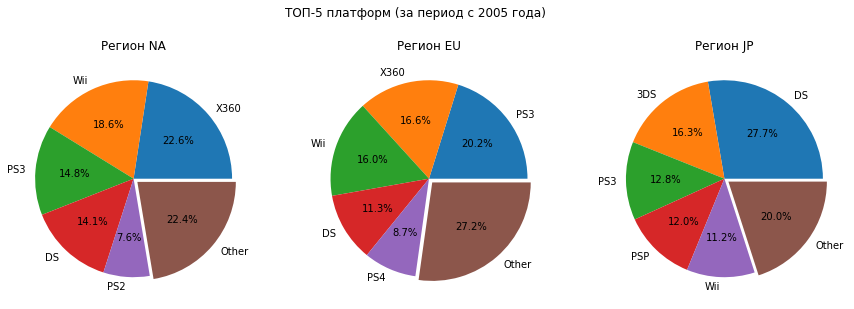

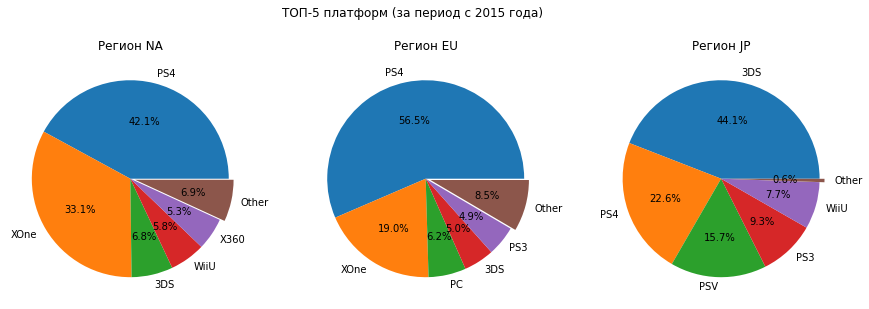

In [71]:
top5_platforms()
top5_platforms(2015)

Видим, что в рамках актуального периода для регионов самыми популярными платформами являются:

- Северная Америка: X360, Wii, PS3, DS, PS2
- Европа: PS3, X360, Wii, DS, PS4
- Япония: DS, 3DS, PS3, PSP, Wii

Если для Америки и Европы состав ТОП-5 платформ почти совпадает, меняются только симпатии к тем или иным приставкам, то для Японии картина совершенно другая - здесь предпочтения отдают портативным "карманным" платформам (DS, 3DS, PSP)

Для периода с 2015 г самыми популярными платформами становятся:

- Северная Америка: PS4, XOne, 3DS, WiiU, X360
- Европа: PS4, XOne, PC, 3DS, PS3
- Япония: 3DS, PS4, PSV, PS3, WiiU

И для Америки, и для Европы бесспорными лидерами становятся новые платформы PS4 и XOne (в совокупности более 75%). В Японии лидирует портативная 3DS (>44%), PS4, портативная PSV. Для всех регионов доля других платформ резко сократилась: в Америке и Европе до 7-8.5%, а в Японии почти исчезла (<1%)

<br><br>

## 4.2. Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (ТОП-5). Поясним разницу

Выведем ТОП-5 жанров по регионам в рамках актуального периода, а также в период с 2015 г и сравним:

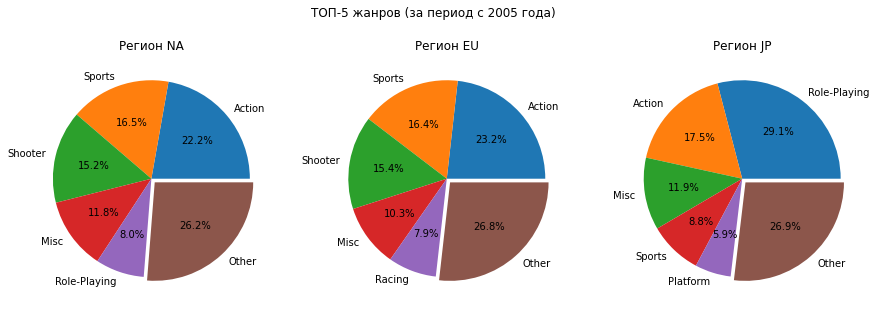

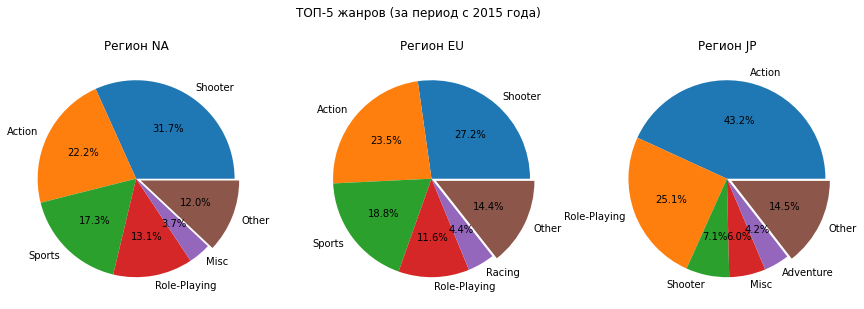

In [72]:
top5_genres()
top5_genres(2015)

Видим, что в рамках актуального периода для регионов самыми популярными жанрами являются:

- Северная Америка: Action, Sports, Shooter, Misc, Role-Playing
- Европа: Action, Sports, Shooter, Misc, Racing
- Япония: Role-Playing, Action, Misc, Sports, Platform

Для Америки и Европы состав ТОП-5 жанров почти совпадает, даже по процентам. В Японии на первом месте стоят ролевые игры, но жанры Action, Misc и Sports также популярны

Для периода с 2015 г самыми популярными жанрами становятся:

- Северная Америка: Shooter, Action, Sports, Role-Playing, Misc
- Европа: Shooter, Action, Sports, Role-Playing, Racing
- Япония: Action, Role-Playing, Shooter, Misc, Adventure

И для Америки, и для Европы с третьего на первое место синхронно поднимается жанр Shooter. Остальные жанры остаются почти без изменений. В Японии на первое место (аж с 43%) выходит жанр Action, поменявшись местами с Role-Playing. Из ТОП-5 исчезли спортивные игры и платформеры, но добавились Shooter и Adventure

<br><br>

## 4.3. Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе

Выведем ТОП-5 рейтингов по регионам в рамках актуального периода, а также в период с 2015 г и сравним:

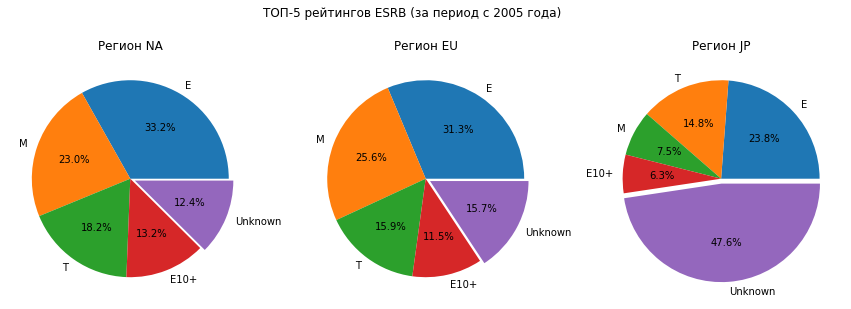

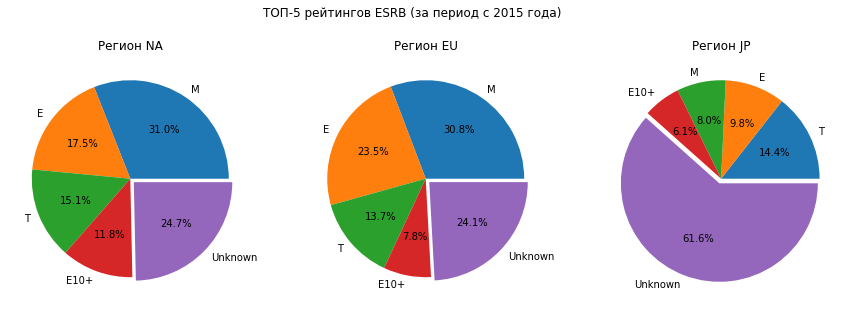

In [73]:
top5_ratings()
top5_ratings(2015)

Видим, что для Америки и Европы картина распределения по рейтингам практически идентичная. Отличия только между периодами - в актуальном выбранном нами периоде на первом месте находятся игры с рейтингом "E" (без ограничений), а затем с рейтингом "M" (17+). А в периоде с 2015 года - они меняются местами

С Японией всё по-другому. Дело в том, что рейтинг ESRB не применяется в этом регионе. Поэтому большинство популярных и продаваемых игр в Японии остаются без рейтинга ESRB. Выведем игры с рейтингом "Unknown", с максимальными продажами в Японии и посмотрим, для каких платформ они разрабатывались:

In [74]:
df.query('rating == "Unknown"').sort_values(by='jp_sales', ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,Unknown,18.24
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,Unknown,15.13
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,Unknown,4.87
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,4.34,2.71,3.96,0.76,NaN,NaN,Unknown,11.77
340,Friend Collection,DS,2009,Misc,0.00,0.00,3.67,0.00,NaN,NaN,Unknown,3.67
385,Monster Hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,NaN,NaN,Unknown,3.44
412,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,NaN,NaN,Unknown,3.28
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,Unknown,8.06
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68


Как видим, преимущественно это игры для исконно Японских "карманных" платформ 3DS и DS. Поэтому этим играм рейтинг ESRB не проставляется

<br><br>

## 4.4. Подведём итоги - составим портрет пользователя каждого региона

ВЫВОДЫ:

Исходя из полученных данных для более актуального портрета пользователя целесообразно исследовать максимально современные данные, а именно период с 2015 г.

Типичный пользователь из Северной Америки очень похож в предпочтениях на европейского пользователя - они оба предпочитают набирающую популярность платформу PS4 (реже XOne), больше всего играют в игры жанра Shooter и Action с возрастными ограничениями 17+

Пользователь из Японии играет на родной портативной платформе 3DS (реже PS4) в игры жанра Action и Role-Playing с возрастными ограничениями 13+

<br><br><br><br>

# 5. Проверим гипотезы

Нулевая гипотеза - всегда о равенстве среднего, об отсутствии различий

Для проверки статистической гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем t-критерий Стьюдента (с параметром equal_var=False, так как нет никакого основания считать дисперсии выборок равными)

Выберем общепринятое пороговое значение alpha для p-уровеня значимости, равное 0.05 (т.е. 5%)

<br><br>

## 5.1. Проверим гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые

Сформулируем нулевую (H0) и альтернативную (H1) гипотезы:

- H0: Средние пользовательские рейтинги платформ XOne и PC равны
- H1: Средние пользовательские рейтинги платформ XOne и PC различаются

In [75]:
year = 2014

In [76]:
user_score_xone = df.query('year_of_release >= @year and platform == "XOne"')['user_score'].dropna()
user_score_pc = df.query('year_of_release >= @year and platform == "PC"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

print('Средний пользовательский рейтинг платформы XOne:', round(user_score_xone.mean(), 2))
print('Средний пользовательский рейтинг платформы PC  :', round(user_score_pc.mean(), 2))
print('p-значение:', results.pvalue)
print('Отвергаем нулевую гипотезу' if results.pvalue < alpha else 'Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг платформы XOne: 6.59
Средний пользовательский рейтинг платформы PC  : 6.32
p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


Принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC

<br><br>

## 5.2. Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевую (H0) и альтернативную (H1) гипотезы:

- H0: Средние пользовательские рейтинги жанров Action и Sports равны
- H1: Средние пользовательские рейтинги жанров Action и Sports различаются

In [77]:
user_score_action = df.query('year_of_release >= @year and genre == "Action"')['user_score'].dropna()
user_score_sports = df.query('year_of_release >= @year and genre == "Sports"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('Средний пользовательский рейтинг жанра Action:', round(user_score_action.mean(), 2))
print('Средний пользовательский рейтинг жанра Sports:', round(user_score_sports.mean(), 2))
print()
print('p-значение:', results.pvalue)
print('Отвергаем нулевую гипотезу' if results.pvalue < alpha else 'Не получилось отвергнуть нулевую гипотезу')

Средний пользовательский рейтинг жанра Action: 6.77
Средний пользовательский рейтинг жанра Sports: 5.23

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу о различии средних пользовательских рейтингов жанров Action и Sports

<br><br>

## 5.3. Подведём итоги проверки гипотез

ВЫВОДЫ:

- Подтвердили гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые
- Подтвердили гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные

<br><br><br><br>

# 6. Общий вывод

Итак, в рамках данного проекта мы:

1. Изучили общую информацию о датасете
2. В результате предобработки и подготовки данных: заменили названия столбцов, обработали пропуски, преобразовали типы данных при необходимости, выявили явные и неявные дубликаты, проверили данные на аномальные значения, посчитали суммарные продажи во всех регионах
3. В результате исследовательского анализа данных: определили перспективные платформы на 2017 год, выявили связь между продажами игр и оценками критиков, определили наиболее продаваемые жанры
4. Выявили предпочтения и составили портреты типичных пользователей для каждого региона
5. Проверили гипотезы о равенстве средних пользовательских рейтингов платформ XOne и PC и о равенстве средних пользовательских рейтингов жанров Action и Sports

Итоговое заключение и рекомендации на 2017 г:

- Сосредоточиться на играх для современных и перспективных платформ, таких как: PS4, XOne, 3DS
- Выбирать наиболее популярные и продаваемые жанры: Shooter, Action, Role-Playing, Sports
- Также не забывать про игры для PC - компьютер пережил не одно поколение консолей и ещё долго будет на плаву
- Учитывать, что большим спросом пользуются игры с категорией "М" (возраст 17+), а также "Е" (для всех)
- Обращать внимание на обзоры и рецензии критиков - их положительные оценки напрямую влияют на коммерческий успех игр